In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [2]:
AIR_DF = pd.read_csv(
    "C:/Users/admin/Masters-s-project/masters_project/machine_learning/data_analysis/air_pollution_smog_clear.csv",
    index_col="date",
    parse_dates=True,
)
# df.index.freq='MS'
AIR_DF.pop("entry_id")
AIR_DF.head()

,PM1,PM2.5,PM10,temp,pressure,humidity
date,,,,,,
2021-11-12 20:30:17,0.0,0.0,0.0,26.47,1022.04517,39.31152
2021-11-12 20:30:35,22.0,33.0,38.0,26.67,1022.39905,39.24609
2021-11-12 20:30:52,23.0,35.0,44.0,26.69,1022.33557,39.18848
2021-11-12 20:31:10,25.0,39.0,48.0,26.71,1022.28021,39.74805
2021-11-12 20:31:41,24.0,38.0,45.0,26.73,1022.37970,39.12109


In [3]:
def pop_columns(df):

    indexes = ["PM1", "PM2.5", "PM10", "temp", "pressure", "humidity"]

    pops = [i for i in range(len(indexes)) if i != indexes[i]]

    finnaly_pops = []

    for i in range(len(pops)):
        finnaly_pops.append(df[indexes[i]])

    return finnaly_pops

In [4]:
AIR_DF = AIR_DF["PM1"]
AIR_DF.head()

date
2021-11-12 20:30:17     0.0
2021-11-12 20:30:35    22.0
2021-11-12 20:30:52    23.0
2021-11-12 20:31:10    25.0
2021-11-12 20:31:41    24.0
Name: PM1, dtype: float64

<AxesSubplot:xlabel='date'>

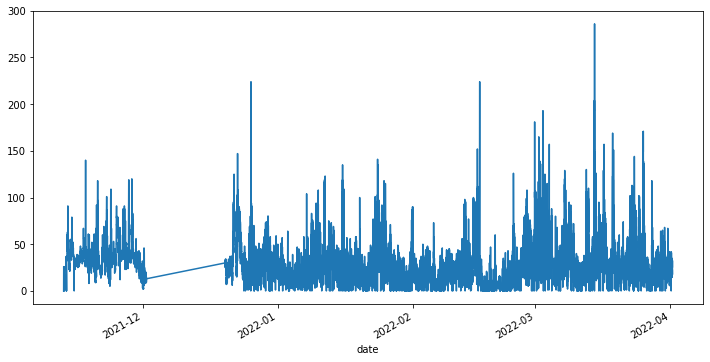

In [5]:
AIR_DF.plot(figsize=(12, 6))

In [6]:
results = seasonal_decompose(AIR_DF["PM1"])
# results.plot()

KeyError: 'PM1'

In [ ]:
len(AIR_DF)

260383

In [ ]:
train = AIR_DF.iloc[:25000]
test = AIR_DF.iloc[25000:]

In [ ]:
scaler = MinMaxScaler()

In [ ]:
AIR_DF.head(), AIR_DF.tail()

(date
 2021-11-12 20:30:17     0.0
 2021-11-12 20:30:35    22.0
 2021-11-12 20:30:52    23.0
 2021-11-12 20:31:10    25.0
 2021-11-12 20:31:41    24.0
 Name: PM1, dtype: float64,
 date
 2022-04-01 13:48:50    29.0
 2022-04-01 13:49:26    17.0
 2022-04-01 13:50:01    24.0
 2022-04-01 13:50:34    22.0
 2022-04-01 13:51:16    22.0
 Name: PM1, dtype: float64)

In [ ]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

ValueError: Expected 2D array, got 1D array instead:
array=[ 0. 22. 23. 25. 24. 24. 23. 23. 23. 22. 22. 24. 23. 22. 24. 24.  0.  0.
  0.  4. 24. 24. 24. 24. 24. 24. 24. 23. 24. 25. 25. 24. 25. 25. 25. 23.
 23. 24. 26. 24. 24. 24. 22. 22. 23. 23. 24. 23. 24. 24. 24. 23. 24. 22.
 23.  0. 22. 24. 24. 22. 23. 24.  0.  0. 22. 26. 26. 26. 26. 20.  0.  0.
 28. 30. 32. 32. 32. 32. 32. 32. 32. 36. 36. 36. 36. 27. 28. 33. 37.  0.
 23. 33. 32. 30. 33. 35. 37. 37. 37. 37. 34. 33. 33. 32. 32. 30. 33. 33.
 32. 31. 33. 33. 32. 34. 33. 33. 33. 33. 33. 33. 34. 34. 34. 32. 32. 32.
 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 35. 35. 35. 34. 37. 37.
 37. 37. 37. 37. 37. 37. 37. 37. 37. 37. 37. 37.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
scaled_train[:10]

array([[0.        , 0.        , 0.        , 0.0891207 , 0.99964765,
        0.12614598],
       [0.59459459, 0.50769231, 0.45783133, 0.09025455, 0.99992766,
        0.12520385],
       [0.62162162, 0.53846154, 0.53012048, 0.09036793, 0.99987743,
        0.12437433],
       [0.67567568, 0.6       , 0.57831325, 0.09048132, 0.99983362,
        0.13243158],
       [0.64864865, 0.58461538, 0.54216867, 0.0905947 , 0.99991234,
        0.12340398],
       [0.64864865, 0.58461538, 0.54216867, 0.0906514 , 0.99991882,
        0.1227291 ],
       [0.62162162, 0.53846154, 0.60240964, 0.09076478, 0.99992761,
        0.12856458],
       [0.62162162, 0.56923077, 0.59036145, 0.09099155, 0.99988013,
        0.12194161],
       [0.62162162, 0.53846154, 0.55421687, 0.09099155, 0.99995581,
        0.12109798],
       [0.59459459, 0.52307692, 0.54216867, 0.09121832, 0.99990833,
        0.12097141]])

In [ ]:
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(
    scaled_train, scaled_train, length=n_input, batch_size=1
)

In [ ]:
X, y = generator[0]
print(f"Given the Array: \n{X.flatten()}")
print(f"Predict this y: \n {y}")

Given the Array: 
[0.         0.         0.         0.0891207  0.99964765 0.12614598
 0.59459459 0.50769231 0.45783133 0.09025455 0.99992766 0.12520385
 0.62162162 0.53846154 0.53012048 0.09036793 0.99987743 0.12437433]
Predict this y: 
 [[0.67567568 0.6        0.57831325 0.09048132 0.99983362 0.13243158]]


In [ ]:
X.shape

(1, 3, 6)

In [ ]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(
    scaled_train, scaled_train, length=n_input, batch_size=1
)

In [ ]:
# imports

In [ ]:
# define model
model = Sequential()
model.add(LSTM(100, activation="relu", input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse")

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               40800     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit model
epochs = [25, 50, 100]
for i in epochs:
    model.fit(generator, epochs=i)

Epoch 1/50


InvalidArgumentError: Graph execution error:

Detected at node 'sequential_2/lstm_2/TensorArrayUnstack/TensorListFromTensor' defined at (most recent call last):
    File "c:\Users\admin\miniconda3\envs\tensorflow\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\admin\miniconda3\envs\tensorflow\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\Users\admin\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "c:\Users\admin\miniconda3\envs\tensorflow\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "c:\Users\admin\miniconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "c:\Users\admin\miniconda3\envs\tensorflow\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\admin\miniconda3\envs\tensorflow\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "c:\Users\admin\miniconda3\envs\tensorflow\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "c:\Users\admin\miniconda3\envs\tensorflow\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\admin\miniconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "c:\Users\admin\miniconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "c:\Users\admin\miniconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelbase.py", line 367, in dispatch_shell
      await result
    File "c:\Users\admin\miniconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "c:\Users\admin\miniconda3\envs\tensorflow\lib\site-packages\ipykernel\ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "c:\Users\admin\miniconda3\envs\tensorflow\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\admin\miniconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "c:\Users\admin\miniconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "c:\Users\admin\miniconda3\envs\tensorflow\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\admin\miniconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\admin\miniconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\admin\miniconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\admin\AppData\Local\Temp\ipykernel_21328\3800138106.py", line 2, in <cell line: 2>
      model.fit(generator, epochs=50)
    File "c:\Users\admin\miniconda3\envs\tensorflow\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\admin\miniconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\admin\miniconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "c:\Users\admin\miniconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\admin\miniconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "c:\Users\admin\miniconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py", line 889, in train_step
      y_pred = self(x, training=True)
    File "c:\Users\admin\miniconda3\envs\tensorflow\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\admin\miniconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\admin\miniconda3\envs\tensorflow\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\admin\miniconda3\envs\tensorflow\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\admin\miniconda3\envs\tensorflow\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\admin\miniconda3\envs\tensorflow\lib\site-packages\keras\engine\sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "c:\Users\admin\miniconda3\envs\tensorflow\lib\site-packages\keras\engine\functional.py", line 458, in call
      return self._run_internal_graph(
    File "c:\Users\admin\miniconda3\envs\tensorflow\lib\site-packages\keras\engine\functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\admin\miniconda3\envs\tensorflow\lib\site-packages\keras\layers\rnn\base_rnn.py", line 515, in __call__
      return super(RNN, self).__call__(inputs, **kwargs)
    File "c:\Users\admin\miniconda3\envs\tensorflow\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\admin\miniconda3\envs\tensorflow\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\admin\miniconda3\envs\tensorflow\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\admin\miniconda3\envs\tensorflow\lib\site-packages\keras\layers\rnn\lstm.py", line 574, in call
      last_output, outputs, states = backend.rnn(
    File "c:\Users\admin\miniconda3\envs\tensorflow\lib\site-packages\keras\backend.py", line 4612, in rnn
      input_ta = tuple(
    File "c:\Users\admin\miniconda3\envs\tensorflow\lib\site-packages\keras\backend.py", line 4613, in <genexpr>
      ta.unstack(input_) if not go_backwards else ta
Node: 'sequential_2/lstm_2/TensorArrayUnstack/TensorListFromTensor'
Specified a list with shape [?,1] from a tensor with shape [1,6]
	 [[{{node sequential_2/lstm_2/TensorArrayUnstack/TensorListFromTensor}}]] [Op:__inference_train_function_3884]

In [ ]:
loss_per_epoch = model.history.history["loss"]
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)

AttributeError: 'NoneType' object has no attribute 'history'

In [ ]:
last_train_batch = scaled_train[-12:]

In [ ]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [ ]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 167ms/step


array([[1.0508027]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.67548077])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):

    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]

    # append the prediction into the array
    test_predictions.append(current_pred)

    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

1/1 [==============================] - 0s 19ms/step


In [ ]:
test_predictions

[array([0.6157319], dtype=float32),
 array([0.5925479], dtype=float32),
 array([0.7672322], dtype=float32),
 array([0.8408352], dtype=float32),
 array([0.9531361], dtype=float32),
 array([0.9373985], dtype=float32),
 array([0.8562658], dtype=float32),
 array([0.74841475], dtype=float32),
 array([0.64220357], dtype=float32),
 array([0.6052617], dtype=float32),
 array([0.56225556], dtype=float32),
 array([0.5900758], dtype=float32)]

In [ ]:
test.head()

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966


In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test["Predictions"] = true_predictions

C:\Users\admin\AppData\Local\Temp\ipykernel_22468\4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<AxesSubplot:xlabel='Date'>

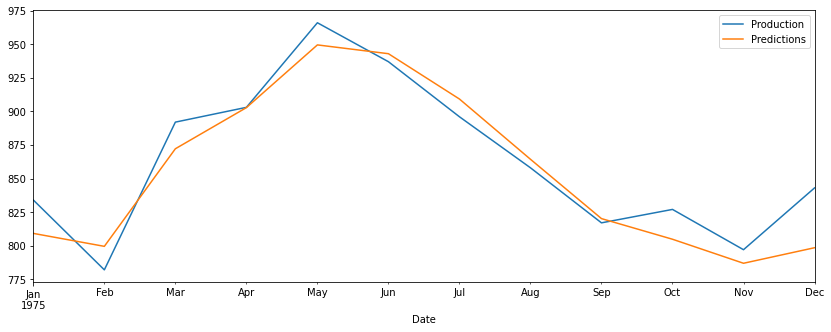

In [ ]:
test.plot(figsize=(14, 5))

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(test["PM1"], test["Predictions"]))
print(rmse)

19.208747555149632
